<a href="https://colab.research.google.com/github/hussain0048/Natural-language-processing/blob/main/Visualizing_tweets_and_the_Logistic_Regression_model_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objectives:**

Visualize and interpret the logistic regression model

# **Import the required libraries**


In [ ]:
import nltk                         # NLP toolbox
from os import getcwd
import pandas as pd                 # Library for Dataframes 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt     # Library for visualization
import numpy as np                  # Library for math functions
#from utils import process_tweet, build_freqs # Our functions for NLP

# **Load the NLTK sample dataset**


In [4]:
# select the set of positive and negative tweets
import nltk
nltk.download('twitter_samples')
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists. 
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

# split the data into two pieces, one for training and one for testing (validation set) 
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg 

print("Number of tweets: ", len(train_x))


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


Number of tweets:  8000


# **Load the extracted features**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd 
data = pd.read_csv('/content/drive/MyDrive/Courses /Data Science /NLP/Natural Language Processing Specialization/Natural Language Processing with Classification and Vector Spaces/Dataset/logistic_features.csv',encoding = 'latin')

In [ ]:
data.head(10) # Print the first three data entries

In [ ]:
# Each feature is labeled as bias, positive and negative
X = data[['bias', 'positive', 'negative']].values # Get only the numerical values of the dataframe
Y = data['sentiment'].values; # Put in Y the corresponding labels or sentiments

print(X.shape) # Print the shape of the X part
print(X) # Print some rows of X

# **Load a pretrained Logistic Regression model**


In [9]:
theta = [7e-08, 0.0005239, -0.00055517]

# **Plot the samples in a scatter plot**


Text(0, 0.5, 'Negative')

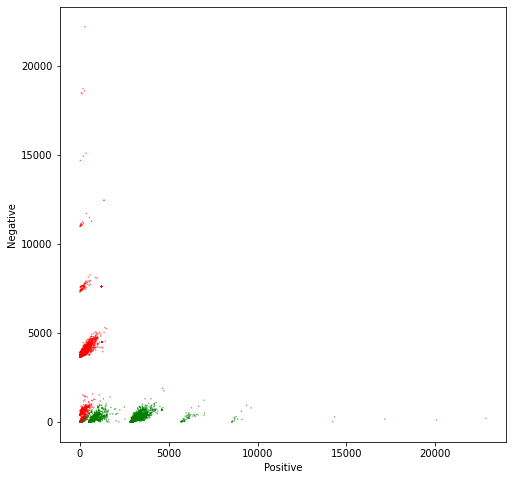

In [10]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# **Plot the model alongside the data**


In [11]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

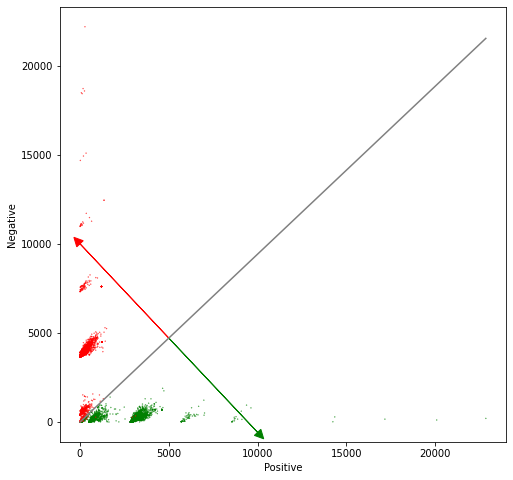

In [12]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()

# **References**

[1- Visualizing tweets and the Logistic Regression model](https://github.com/ibrahimjelliti/Deeplearning.ai-Natural-Language-Processing-Specialization/blob/master/1%20-%20Natural%20Language%20Processing%20with%20Classification%20and%20Vector%20Spaces/Labs/Week%201/NLP_C1_W1_lecture_nb_03.ipynb)